<h1 style="text-align:center;">Лабораторная работа №6</h2>

<h2 style="text-align:center;">Решение жесткой системы однородных  дифференциальных уравнений явными методами</h2>

<h3 style="text-align:center;">Тулупов Николай Дмитриевич</h3>
<h3 style="text-align:center;">Б01-204</h3>

Цель: решить выбранную задачу перечисленными методами:   

0) Попробовать явный метод из лабы 2
1) Неявные методы Рунге-Кутта 3+ порядка
2) Невные методы Адамса / ФДН (методы Гира) 3+ порядка
3) Метод Розенброка-Ваннера 2, 3+ порядка   
4) методы Гира в представлении Нордсика 
     
<img src="images\task.png" alt="drawing" width="750"/>

**Чем отличаются жесткие системы?**   
 У них есть быстро затухающие компоненты и медленно меняющиеся одновременно. Поэтому при решении обычными (явными) методами нужно брать очень маленький шаг, иначе решение разлетается.

**Почему неявные методы лучше для жёстких?**   
Потому что они устойчивы при больших шагах даже для "резких" уравнений!

**Что такое уравнение Ван-дер-Поля?**   
Это нелинейное дифференциальное уравнение, описывающее нелинейный колебательный контур (например, с диодами, лампами, транзисторами). Оно впервые появилось в радиотехнике.   
Где используется: электрические цепи (аналог генератора), биомедицинские модели (сердечный ритм), нелинейная динамика, теория автоколебаний



In [56]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [57]:
t_start = 0
t_stop = 20
Y0 = [2,    0]
#    y1(0) y2(0)
a1 = 1e3
a2 = 1e6
A1 = 0.5
A2 = 1 + (7 * 1e-7) 

In [58]:
def f(t, Y, a=1e3, A=0.5, omega=1.0):
    y1, y2 = Y
    dy1 = a * (-(y1**3 / 3 - y1) + y2)
    dy2 = -y1 + A * np.cos(omega * t)
    return np.array([dy1, dy2])

### **Явные методы**

Используем явный метод Рунге-Кутты из прошлой лабы, изменив лишь передаваемую вектор-функцию f и начальный столбец Y0.

In [59]:
def runge_kutt_explicit(f, t, Y, h, order, a, A):
    Y = np.array(Y)

    if order == 1:
        k1 = f(t, Y, a, A)
        return Y + h * k1

    elif order == 2:
        k1 = f(t, Y, a, A)
        k2 = f(t + h, Y + h * k1, a, A)
        return Y + h * (k1 + k2) / 2

    elif order == 3:
        k1 = f(t, Y, a, A)
        k2 = f(t + h / 2, Y + h * k1 / 2, a, A)
        k3 = f(t + h, Y - h * k1 + 2 * h * k2, a, A)
        return Y + h * (k1 + 4 * k2 + k3) / 6

    elif order == 4:
        k1 = f(t, Y, a, A)
        k2 = f(t + h / 2, Y + h * k1 / 2, a, A)
        k3 = f(t + h / 2, Y + h * k2 / 2, a, A)
        k4 = f(t + h, Y + h * k3, a, A)
        return Y + h * (k1 + 2 * k2 + 2 * k3 + k4) / 6

    else:
        print("ERROR! Порядок должен быть от 1 до 4")
        return 

In [60]:
def integrate_runge_kutt_explicit(f, Y0, t_start, t_stop, h, order, a, A):
    t = t_start
    Y = np.array(Y0)
    S = [[t] + Y.tolist()]

    while t < t_stop:
        Y = runge_kutt_explicit(f, t, Y, h, order, a, A)
        t += h
        S.append([t] + Y.tolist())

    return S

In [61]:
def drawing(f, method, order, a, A, llen):
    
    h_vals = [10 ** i for i in range (-5, - 5 + llen)]
    x_vals = [0]*llen
    y_vals = [0]*llen

    for i in range(llen):
        S = method(f, Y0, t_start, t_stop, h_vals[i], order, a, A)
        x_vals[i] = [p[1] for p in S]
        y_vals[i] = [p[2] for p in S]
    fig, axs = plt.subplots(int(llen/3), 3, figsize=(15, (4 * llen / 3)))  # llen/3 строки, 3 столбца

    axs = axs.flatten()  # чтобы обращаться как axs[0], axs[1], ...

    for i in range(llen):
        axs[i].plot(x_vals[i], y_vals[i])
        axs[i].set_title(f"Шаг h = {h_vals[i]}")
        axs[i].set_xlabel('x')
        axs[i].set_ylabel('y')
        axs[i].axis('equal')  # чтобы не искажалась орбита
        axs[i].grid(True)

    method_name = method.__name__

    # Красивое название (преобразуем имя функции)
    if "adams" in method_name:
        method_display = "Адамса"
    elif "fdn" in method_name:
        method_display = "ФДН"
    elif "runge" in method_name:
        method_display = "Рунге-Кутты"
    else:
        method_display = method_name  # fallback

    fig.suptitle(f"Траектория-утка уравнения Ван-дер-Поля\nМетод {method_display} {order} порядка", fontsize=16)
    plt.tight_layout()
    plt.show()

In [ ]:
drawing(f, method=integrate_runge_kutt_explicit, order=4, a=a1, A=A1, llen=3)

**Выводы:**     
1) **Траектория-утка**    
при шаге 0,001 явная "утка" - система какое то время движется по медленному (устойчивому) отрезку, потом резко срывается - "нос" или "клюв" утки  

2) **Большой шаг**   
при большом шаге уже возникает переполнение, видим предупреждения   
RuntimeWarning: overflow encountered in scalar power   
  $dy_1 = a * (-(y_1**3 / 3 - y_1) + y_2)$   
  $y$ улетает в числа типа 1e123, в таком масштабе производные становятся почти нулевыми -> $Y_{next} ≈ Y + h * 0 = Y$, поэтому движение прекращается и получается почти горизонтальная линия.
Не будем интегрировать с большим шагом - это бессмысленно.

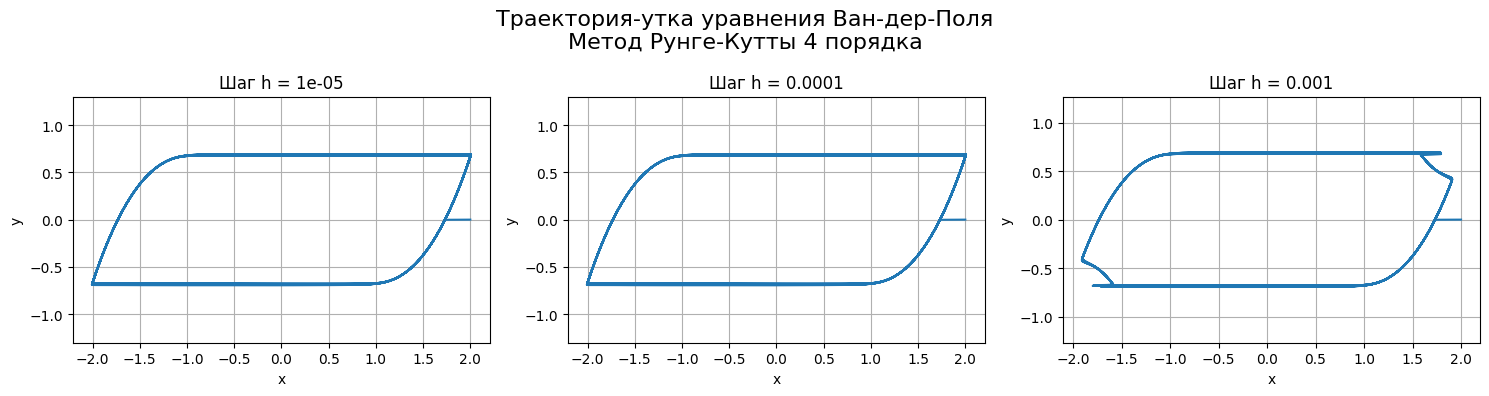

In [ ]:
drawing(f, method=integrate_runge_kutt_explicit, order=4, a=a1, A=A1, llen=3)

In [ ]:
drawing(f, method=integrate_runge_kutt_explicit, order=4, a=a1, A=A2, llen=3)

In [ ]:
drawing(f, method=integrate_runge_kutt_explicit, order=4, a=a2, A=A1, llen=3)

In [ ]:
drawing(f, method=integrate_runge_kutt_explicit, order=4, a=a2, A=A2, llen=3)

**Выводы:**     
3) **Оценим максимальное значение шага, при котором траектория еще выглядит нужным образом.**
$$
h_{max} = 2 / \lambda_{max}
$$   
Получим якобиан системы и посчитаем при $a_1$ и $a_2$:
$$
J =
\begin{bmatrix}
-3a & 0 \\
-1 & 0  
\end{bmatrix}
$$
Тогда  $$h_{max} \approx 2 / a$$.      
$h_{max_{1}} \approx 2 / a_1 = 0.002$   
$h_{max_{2}} \approx 2 / a_2 = 2e-6$ - интегрирование с таким шагом занимает больше 5мин...   
Получается, константа $a$ напрямую влияет на жесткость системы, а значит, на максимальный допустимый шаг.



4) **на что влияет A?**  
A — амплитуда внешнего колебательного воздействия. В якобиан она не входит, а значит, на жескость напрямую не влияет, и на максимальный шаг тоже.
Что делает параметр A?

а. При A = 0
Это автономная система    
Решение — предельный цикл (замкнутая орбита в фазовом пространстве)   
Поведение устойчивое и регулярно колебательное   

б. При 0 < A < 1   
Система слабо возмущена   
Фазовые траектории начинают немного меняться по форме   
Возможны биения, псевдопериодичность   

в. При A ≈ 1   
Появляется тонкая граница между устойчивостью и хаосом      
Система может войти в резонанс, возбуждение может усиливать колебания       
Начинаются неустойчивые "утки" — траектории с длинным "клювом"      
г. При A > 1      
Входит в хаотический режим       
При определённых ω появляются:       
странные аттракторы     
непериодические траектории     
сенситивность к начальному условию    

### **Неявные методы Рунги-Кутта 3+ порядка**

#### **Неявный РК2**   
Начнем с метода 2 порядка. Вспомним, что в лабе 3 прошлого сема мы написали метод Ньютона и МПИ для решения систем нелинейных алгебраических уравнений.   
В Ньютоне надо было считать якобиан, поэтому используем старый МПИ (а в нем старого Гаусса...)
   
Формула метода $y_{n+1} = y_n + h/2 * (f(t_n, y_n) + f(t_{n+1}, y_{n+1}))$

In [81]:
def norm3_vect(vect):
    return pow(sum(el**2 for el in vect), 0.5)

def matr_multipl(A, B):
    
    if A.shape[1] != B.shape[0]: return 
    AB = np.zeros((A.shape[0], B.shape[1]))
    for i in range(A.shape[0]):
        for j in range(B.shape[1]):
            for k in range(A.shape[1]):
                AB[i][j] += A[i][k] * B[k][j]
    
    return AB

def swap_rows(A, row1, row2): #функция для смены строк в матрице
    A[[row1, row2]] = A[[row2, row1]]

def swap_columns(A, col1, col2): #функция для смены столбцов в матрице
    A[:, [col1, col2]] = A[:, [col2, col1]]

def find_max_el(A, iter): #функция для поиска главного элемента матрицы A[iter,iter]
    size = len(A) - iter
    main_element = A[iter,iter]
    i_main, j_main = iter, iter

    for i in range(iter, size): 
        for j in range(iter, size):
            if abs(A[iter:, iter:][i][j]) > abs(main_element):
                i_main, j_main = i, j
                main_element = A[iter:, iter:][i][j]
    return main_element, i_main, j_main

def gauss(A, f):
    size = len(A)
    if A.shape[0] != A.shape[1]:
        print("Матрица не квадратная, решение невозможно!")
        return 
    x = np.arange(size) #массив с порядком корней (порядок будет меняться при перестановке столбцов)

    #прямой ход алгоритма - приводим матрицу A к верхнетреугольному виду
    for iter in range(len(A)):
        ''' Добавим в алгоритм проверку - если на какой-то итерации алгоритма возникла нулевая строка - ответ будет выражаться 
        через одну из переменных (её берем за константу, все остальные переменные будут выражены через нее)'''
        if (len(A) != sum(int(np.any(el)) for el in A)):
            '''Количество переменных превышает количество уравнений, решение не однозначн'''
            print("ERROR! Матрица не квадратная, решение невозможно!")
            return 
        
        main_el, i_main, j_main = find_max_el(A, iter) #максимальный элемент текущей матрицы и его местонахождение
        
        if (i_main != iter): #если элемент еще не в нулевой строке
            swap_rows(A, iter, i_main) #меняем в текущей матрице нулевую строку и строку, содержащую главный элемент            
            swap_rows(f, iter, i_main) #то же самое - в столбце решений       
            
        if (j_main != iter): #если элемент еще не в нулевом столбце
            swap_columns(A, iter, j_main) #меняем в текущей матрице нулевой столбец и столбец, содержащий главный элемент
            #swap_columns(x, iter, j_main) #то же самое - в строке порядка переменных
            x[iter], x[j_main] = x[j_main], x[iter]
        
        if main_el != 0:
            A[iter:, iter:][0] /= main_el #делим нулевую строку текущей матрицы на главный элемент
            f[iter] /= main_el #делим нулевую строку текущего столбца решений на главный элемент
        else:
            print("ERROR! main_el = 0")
            return
    
        for i in range(size - iter - 1):   
            f[i+iter+1] -= (f[iter] * A[iter:, iter:][i+1][0])
            #вычитаем из каждого элемента нулевой в текущем столбце решений, умноженный на нулевой элемент нужной строки - получаем в начале каждой строки единицу
            A[iter:, iter:][i+1] -=  (A[iter:, iter:][0] * A[iter:, iter:][i+1][0])
            #вычитаем из каждой строки нулевую, умноженную на нулевой элемент нужной строки - получаем в начале каждой строки единицу
        
    f[-1] /= A[-1][-1]
    A[size-1][size-1] = 1


    
    #обратный ход алгоритма
    U  = np.zeros((size, 1)) #столбец решений
    for i in range(size-1, -1, -1):
        U[i] = f[i]
        for j in range(i + 1, size):
            U[i] -= U[j] * A[i][j]

    #перестановка переменных в изначальном порядке
    ans = np.zeros((size, 1))
    for i in range(size):
        ans[int(x[i])] = U[i]
    
    return ans




def FPI_(fx, fy, x0, y0, eps=1e-6, max_iter=100):
    x = x0
    y = y0
    iter = 0

    while iter < max_iter:
        try:
            f_x = fx(x, y)
            f_y = fy(x)
            
            # Проверка на допустимость значений
            if not (isinstance(f_x, (int, float)) and isinstance(f_y, (int, float))):
                raise ValueError(f"Некорректное значение: f_x={f_x}, f_y={f_y}")
            
            # Критерий остановки
            if (abs(x - f_x) < eps) and (abs(y - f_y) < eps):
                return x, y, iter 
            
            # Обновление значений
            x = f_x
            y = f_y
        
        except ValueError as e:
            print(f"Ошибка на итерации {iter + 1}: {e}")
            break
        
        iter += 1
    
    print("Превышено максимально допустимое количество итераций.")
    return x, y, iter

In [87]:
def drawing(f, method, order, a, A, llen):
    
    h_vals = [10 ** i for i in range (-5, - 5 + llen)]
    x_vals = [0]*llen
    y_vals = [0]*llen

 

    for i in range(llen):
        S = method(f, Y0, t_start, t_stop, h_vals[i], order, a, A)
        x_vals[i] = [p[1] for p in S]
        y_vals[i] = [p[2] for p in S]
    fig, axs = plt.subplots(int(llen/3), 3, figsize=(15, (4 * llen / 3)))  # llen/3 строки, 3 столбца

    axs = axs.flatten()  # чтобы обращаться как axs[0], axs[1], ...

    for i in range(llen):
        axs[i].plot(x_vals[i], y_vals[i])
        axs[i].set_title(f"Шаг h = {h_vals[i]}")
        axs[i].set_xlabel('x')
        axs[i].set_ylabel('y')
        axs[i].axis('equal')  # чтобы не искажалась орбита
        axs[i].grid(True)

    method_name = method.__name__
    # Красивое название (преобразуем имя функции)
    if "adams" in method_name:
        method_display = "Адамса"
    elif "fdn" in method_name:
        method_display = "ФДН"
    elif method_name == "runge_kutt_explicit":
        method_display = "явный Рунге-Кутты"
    elif method_name == "runge_kutt_implicit":
        method_display = "неявный Рунге-Кутты"
    else:
        method_display = method_name  # fallback

    fig.suptitle(f"Траектория-утка уравнения Ван-дер-Поля\nМетод {method_display} {order} порядка", fontsize=16)
    plt.tight_layout()
    plt.show()

In [88]:
# Неявный метод Рунге–Кутты 2+ порядка через метод простой итерации
import numpy as np

def runge_kutt_implicit(f, t, Y, h, order, a=a1, A=A1, eps=1e-6, max_iter=50):
    Y = np.array(Y)
    f_n = f(t, Y, a, A)
    t_next = t + h

    if order == 2:
        # Метод трапеций (2-й порядок)
        Y_next = Y + h * f_n  # начальное приближение (Эйлер)
        for _ in range(max_iter):
            f_next = f(t_next, Y_next, a, A)
            Y_new = Y + h / 2 * (f_n + f_next)
            if np.linalg.norm(Y_new - Y_next, ord=2) < eps:
                return Y_new
            Y_next = Y_new
        print("FPI WARNING: метод 2 порядка не сошелся")
        return Y_next

    elif order == 3:
        # Метод Гаусса (2 стадии, 3 порядок)
        sqrt3 = np.sqrt(3)
        c1 = 0.5 - sqrt3 / 6
        c2 = 0.5 + sqrt3 / 6

        A_rk = np.array([
            [0.25, 0.25 - sqrt3 / 6],
            [0.25 + sqrt3 / 6, 0.25]
        ])
        b = np.array([0.5, 0.5])
        c = np.array([c1, c2])

        s = 2  # число стадий
        K = np.tile(f_n, (s, 1))  # начальное приближение: просто f_n дважды

        for _ in range(max_iter):
            K_new = np.zeros_like(K)
            for i in range(s):
                arg = Y + h * sum(A_rk[i, j] * K[j] for j in range(s))
                t_i = t + c[i] * h
                K_new[i] = f(t_i, arg, a, A)

            if np.linalg.norm(K_new - K) < eps:
                break
            K = K_new
        else:
            print("FPI WARNING: метод 3 порядка не сошелся")

        Y_next = Y + h * sum(b[i] * K[i] for i in range(s))
        return Y_next

    else:
        print("ERROR! Поддерживаются только порядки 2 и 3")



In [89]:
# Интегратор
def integrate_runge_kutt_implicit(f, Y0, t_start, t_stop, h, order=2, a=a1, A=A1):
    t = t_start
    Y = np.array(Y0)
    S = [[t] + Y.tolist()]

    while t < t_stop:
        Y = runge_kutt_implicit(f, t, Y, h, order, a, A)
        t += h
        S.append([t] + Y.tolist())

    return S

FPI WARNING: метод 2 порядка не сошелся
FPI WARNING: метод 2 порядка не сошелся
FPI WARNING: метод 2 порядка не сошелся
FPI WARNING: метод 2 порядка не сошелся
FPI WARNING: метод 2 порядка не сошелся
FPI WARNING: метод 2 порядка не сошелся
FPI WARNING: метод 2 порядка не сошелся
FPI WARNING: метод 2 порядка не сошелся
FPI WARNING: метод 2 порядка не сошелся
FPI WARNING: метод 2 порядка не сошелся
FPI WARNING: метод 2 порядка не сошелся
FPI WARNING: метод 2 порядка не сошелся
FPI WARNING: метод 2 порядка не сошелся
FPI WARNING: метод 2 порядка не сошелся
FPI WARNING: метод 2 порядка не сошелся
FPI WARNING: метод 2 порядка не сошелся
FPI WARNING: метод 2 порядка не сошелся
FPI WARNING: метод 2 порядка не сошелся
FPI WARNING: метод 2 порядка не сошелся
FPI WARNING: метод 2 порядка не сошелся
FPI WARNING: метод 2 порядка не сошелся
FPI WARNING: метод 2 порядка не сошелся
FPI WARNING: метод 2 порядка не сошелся
FPI WARNING: метод 2 порядка не сошелся
FPI WARNING: метод 2 порядка не сошелся


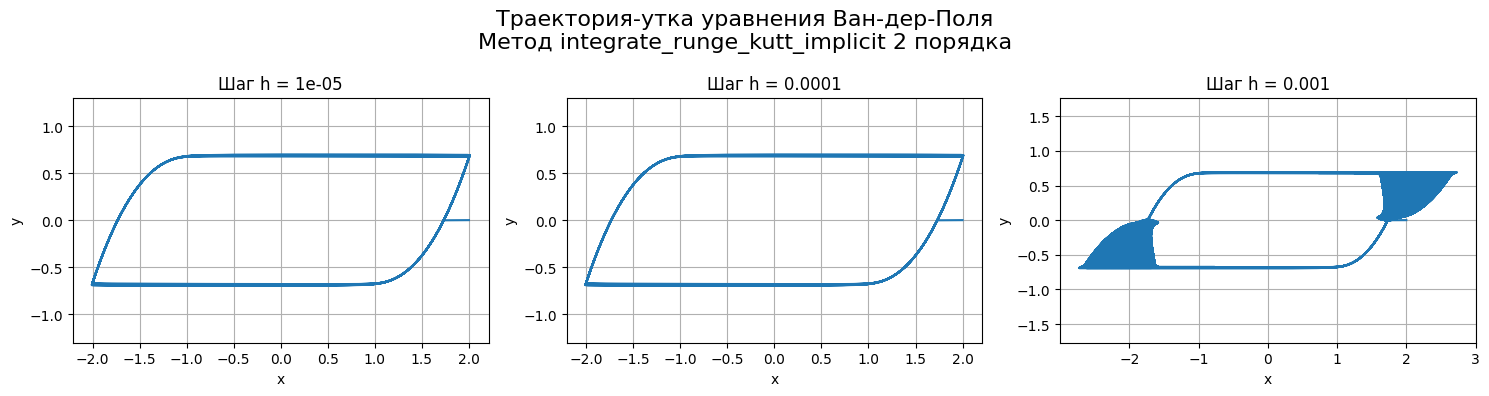

In [92]:
drawing(f, method=integrate_runge_kutt_implicit, order=2, a=a1, A=A1, llen=3)

Как видим, уже при шаге в 0,001 МПИ не успевает улавливать быстрые изменения и перестает сходиться с максимальное установленное количество итераций

FPI WARNING: метод 3 порядка не сошелся
FPI WARNING: метод 3 порядка не сошелся
FPI WARNING: метод 3 порядка не сошелся
FPI WARNING: метод 3 порядка не сошелся
FPI WARNING: метод 3 порядка не сошелся
FPI WARNING: метод 3 порядка не сошелся
FPI WARNING: метод 3 порядка не сошелся
FPI WARNING: метод 3 порядка не сошелся
FPI WARNING: метод 3 порядка не сошелся
FPI WARNING: метод 3 порядка не сошелся
FPI WARNING: метод 3 порядка не сошелся
FPI WARNING: метод 3 порядка не сошелся
FPI WARNING: метод 3 порядка не сошелся
FPI WARNING: метод 3 порядка не сошелся
FPI WARNING: метод 3 порядка не сошелся
FPI WARNING: метод 3 порядка не сошелся
FPI WARNING: метод 3 порядка не сошелся
FPI WARNING: метод 3 порядка не сошелся
FPI WARNING: метод 3 порядка не сошелся
FPI WARNING: метод 3 порядка не сошелся
FPI WARNING: метод 3 порядка не сошелся
FPI WARNING: метод 3 порядка не сошелся
FPI WARNING: метод 3 порядка не сошелся
FPI WARNING: метод 3 порядка не сошелся
FPI WARNING: метод 3 порядка не сошелся


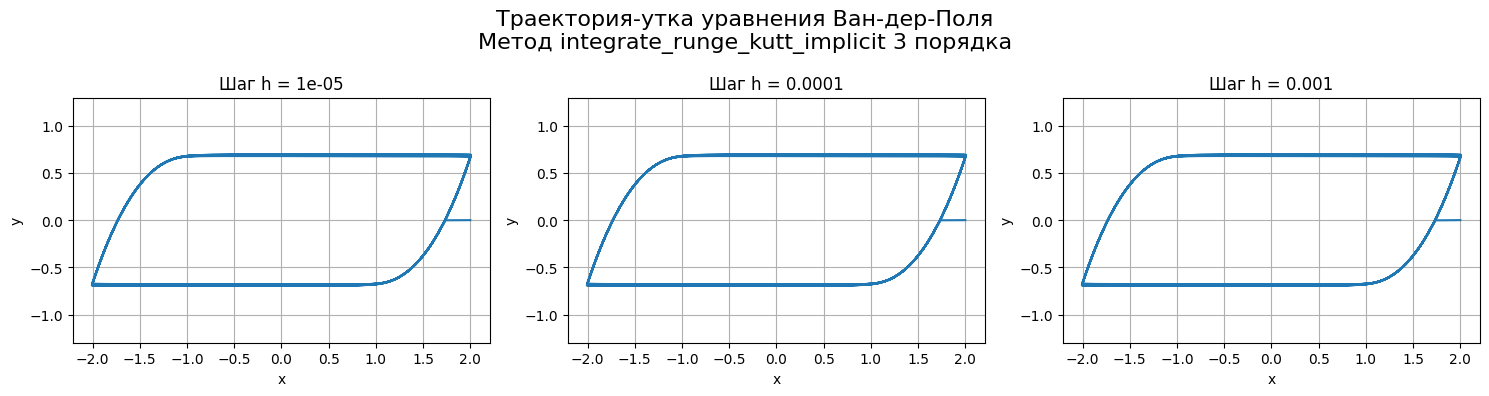

In [91]:
drawing(f, method=integrate_runge_kutt_implicit, order=3, a=a1, A=A1, llen=3)

Как видим, уже при шаге в 0,001 МПИ не успевает улавливать быстрые изменения и перестает сходиться с максимальное установленное количество итераций

#### **Неявный РК3**   
Начнем с двухстадийных схем неявного РК3.   

In [ ]:
#### **Неявный РК2**   